## Related Rates

When studying the behavior of a function, it is often the case that the argument of the function itself depends on another parameter $t$. For instance, the velocity of a car at any given time could depend on the forces acting on the car, which could be due to accelerating, braking, and wind resistance. That is, the velocity $v$ is a function of the the forces $f$: $v = v(f)$. But from experience, we know that these forces and thus the velocity of the car vary over time, such that the rate of change of the velocity over time $t$ is _related_ to the rate of change of the forces over time.

In symbols, we say that the velocity 

\begin{align*}
v(t) = v(f(t)). 
\end{align*}

To find how the velocity varies over time, we can differentiate using the chain rule to find the rate of change of the velocity:

\begin{align*}
v'(t) = v'(f(t)) \times f'(t)
\end{align*}

For instance, if $v(f) = 3f^2-2f+1$, and $f(t) = -10t^3+t$, then

\begin{align*}
f'(t) &= -30t^2+1 \\ 
\text{ and }  
v'(f) &= 6f-2 \\
&= 6(-10t^3+t) - 2 \\ 
&= -60t^3+6t-2
\end{align*}

so that the rate of change of the velocity as a function of time is 

\begin{align*} \tag{1}
v'(t) &= (6f-2)\times (-30t^2+1) 
\end{align*}

or 

\begin{align*}\tag{2}
v'(t) = (-60t^3 + 6t -2) \times (-30t^2 + 1)
\end{align*}


In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

### Some examples 

Let us consider an example. Imagine that we are lying on the $y$ axis on the coordinate $(0, 3)$ and we want to find how the distance between us and the parabola $f(x) = y = \frac{1}{4}x^2 - 2$ varies as a function of the coordinates of the parabola $(x, f(x))$, as seen on the graph below. 

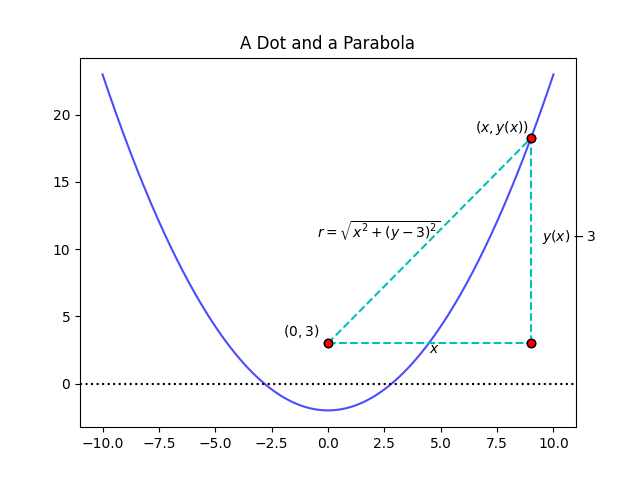

In [6]:
def parabola(x):
    return (1/4)*x*x -2

x = np.linspace(-10, 10, 10000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
xmid = (x1+x0)/2
ymid = (y1+y0)/2
        
fig, ax = plt.subplots()

ax.plot(x, parabola(x), color='b', alpha=0.7)
ax.plot([x0, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x0, x1], [y0, y0], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x1, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")


#ax.grid()
ax.text(xmid-5, ymid+0.2, '$r = \\sqrt{x^2+(y-3)^2}$')
ax.text(xmid, y0-0.7, '$x$')
ax.text(x1+0.5, ymid, '$y(x)-3$')
ax.text(x0-2, y0+0.5, '$(0, 3)$')
ax.text(x1-2.5, y1+0.5, '$(x, y(x))$')
ax.axhline(0, ls=':', color='k')
ax.set_title("A Dot and a Parabola")
plt.show()

From the graph above, it follows that $r^2 = x^2 + (y-3)^2$. If we differentiate with respect to $x$, we can determine how the rate of change of the distance $r$ is related to the rate of change of the function $y(x) = \frac{1}{4}x^2 -2$: 

\begin{align*}
2rr'(x) &= 2x + 2(y-3)y'(x)\\
\implies r'(x) &= \frac{x + (y-3)y'(x)}{r} \\
&= \frac{x + (y-3)y'(x)}{\sqrt{x^2 + (y-3)^2}}
\end{align*}

But recall that $y = \frac{1}{4}x^2-2$, so that $y'(x) = \frac{1}{2}x$ and $r = \sqrt{x^2 + (\frac{1}{4}x^2-5)^2} = \sqrt{\frac{1}{16}x^4+\frac{7}{2}x^2+25}$, so that this derivative is a function of $x$:

\begin{align*}
r'(x) &= \frac{x + (\frac{1}{4}x^2-2-3)(\frac{1}{2}x)}{\sqrt{\frac{1}{16}x^4-\frac{3}{2}x^2+25}} \\
&= \frac{\frac{1}{8}x^3-\frac{3}{2}x}{\sqrt{\frac{1}{16}x^4-\frac{3}{2}x^2+25}}
\end{align*}


In the following plot, we will consider the graphs of both $r(x)$ and $r'(x)$.


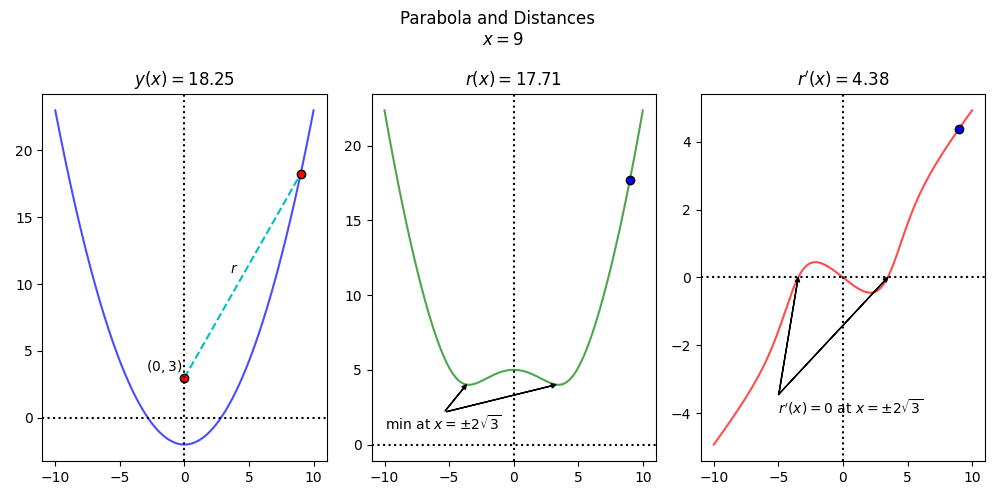

In [7]:
"""
The following graphs will be static for testing. 
Later on I will animate these graphs to have a visual 
representation of the rate of change. The annimation 
itself would be a related rate -- could comment on this 
during the lesson.

To maintain each cell selfconsistent, I will redefine
common parameters such as the x array, the parabola, 
midpoints, ect. 
"""
#define the functions for r and its derivative
def rOfX(x):
    return np.sqrt((1/16)*x**4 - (3/2)*x**2 + 25)

def rPrime(x):
    return ((1/8)*x**3 - (3/2)*x)/rOfX(x)

x = np.linspace(-10, 10, 1000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
x2 = -9
y2 = parabola(x2)
xmid1 = (x1+x0)/2
ymid1 = (y1+y0)/2
xmid2 = (x2+x0)/2
ymid2 = (y2+y0)/2

#below we find the cordinates for the extrema
xmin1 = -2*np.sqrt(3)
xmin2 = 2*np.sqrt(3)
rmin = rOfX(xmin1)
rp0 = 0
rp1 = rPrime(xmin1)
rp2 = rPrime(xmin2)

#plot the parabola
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].plot(x, parabola(x), color='b', alpha=0.7)
ax[0].plot([x0, x1], [y0, y1], color='c', 
        marker='o', markerfacecolor='red', 
        markeredgecolor='black', ls="--")

#plot the distance
ax[1].plot(x, rOfX(x), color='g', alpha=0.7)
ax[1].plot(x1, rOfX(x1), color='c', ls='',
           marker='o', #label='$x = {}$'.format(x1), 
           markerfacecolor='b',
           markeredgecolor='k')

#plot the derivative
ax[2].plot(x, rPrime(x), color='r', alpha=0.7)
ax[2].plot(x1, rPrime(x1), color='c', ls='',
           marker='o', #label='$x = {}$'.format(x1),
           markerfacecolor='b', 
           markeredgecolor='k')

#create titles that inform of x and y(x), r(x), r'(x)
ax[0].set_title('$y(x)= {}$'.format(np.round(parabola(x1), 2)))
ax[1].set_title('$r(x) = {}$'.format(np.round(rOfX(x1), 2)))
ax[2].set_title("$r'(x) = {}$".format(np.round(rPrime(x1), 2)))

#create coordinate axes
for a in ax:
    a.axhline(0, ls=':', color='k')
    a.axvline(0, ls=":", color='k')
    #a.legend()

#annotations and text
ax[0].text(x0-3, y0+0.5, '$(0, 3)$')
ax[0].text(xmid-1, ymid+0.2, '$r$')
ax[1].annotate(
    'min at $x=\\pm 2\\sqrt{3}$', 
    xy=(xmin1-.2, rmin), 
    xytext=(-10, 1),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[1].annotate(
    '', 
    xy=(xmin2-.2, rmin), 
    xytext=(-5.2, 2.2),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    "$r'(x)= 0$ at $x=\\pm 2\\sqrt{3}$", 
    xy=(xmin1, rp1), 
    xytext=(-5, -4),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(xmin2, rp2), 
    xytext=(-5, -3.45),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)


fig.suptitle('Parabola and Distances \n $x={}$'.format(x1))
fig.tight_layout()
plt.show()

As a final visualization, below we present an interactive simulation of the situation above.

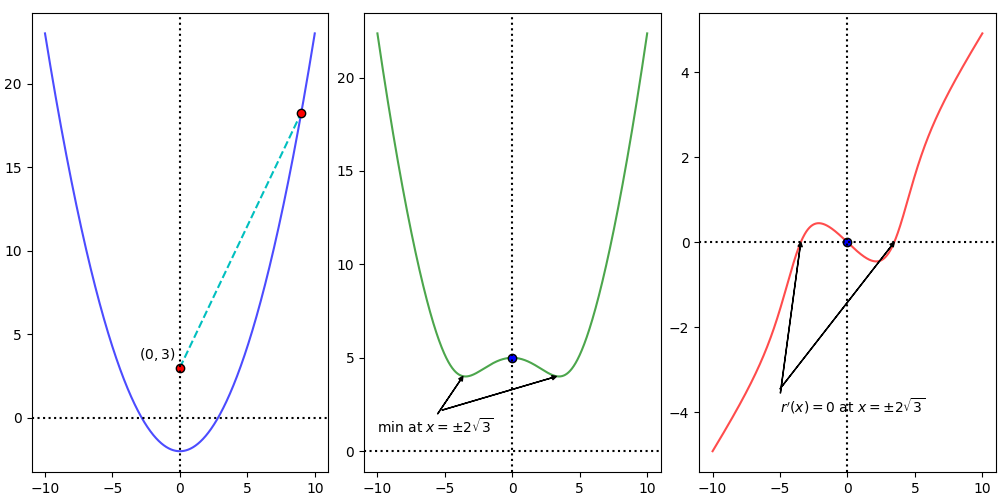

In [8]:
"""
In this cell, I will create an interactive graph
where the user will be able to change the x coordinate
of the functions above. It is really similar to the 
animation I made, but now it will be a live 
interaction.
"""

output = wd.Output()

#initialize the graphs of the parabola, 
#the distance and its derivative

x = np.linspace(-10, 10, 1000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
x2 = -9
y2 = parabola(x2)
xmid1 = (x1+x0)/2
ymid1 = (y1+y0)/2
xmid2 = (x2+x0)/2
ymid2 = (y2+y0)/2

#below we find the coordinates for the extrema
xmin1 = -2*np.sqrt(3)
xmin2 = 2*np.sqrt(3)
rmin = rOfX(xmin1)
rp0 = 0
rp1 = rPrime(xmin1)

with output:
    fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(10,5))

fig.canvas.toolbar_position = 'bottom'

#plot all the static functions as above, what will be updated are 
#just the moving coordinates
ax[0].plot(x, parabola(x), color='b', alpha=0.7)


#plot the distance
ax[1].plot(x, rOfX(x), color='g', alpha=0.7)

#plot the derivative
ax[2].plot(x, rPrime(x), color='r', alpha=0.7)

#empty arrays to update coordinate positions
coor0, = ax[0].plot([x0, x1], [y0, y1], color='c',
                    marker='o', markerfacecolor='r',
                    markeredgecolor='k', ls='--')
coor1, = ax[1].plot([x0], [rOfX(x0)], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')
coor2, = ax[2].plot([x0], [rPrime(x0)], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')

#template for printing the coordinate values on plot
title0 = fig.suptitle("")
title1 = ax[0].set_title("")
title2 = ax[1].set_title("")
title3 = ax[2].set_title("")

#annotations and text
ax[0].text(x0-3, y0+0.5, '$(0, 3)$')
#ax[0].text(xmid-1, ymid+0.2, '$r$')
ax[1].annotate(
    'min at $x=\\pm 2\\sqrt{3}$', 
    xy=(xmin1-.2, rmin), 
    xytext=(-10, 1),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[1].annotate(
    '', 
    xy=(xmin2-.2, rmin), 
    xytext=(-5.2, 2.2),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    "$r'(x)= 0$ at $x=\\pm 2\\sqrt{3}$", 
    xy=(xmin1, rp1), 
    xytext=(-5, -4),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(xmin2, rp2), 
    xytext=(-5, -3.45),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)


for a in ax:
    a.axhline(0, ls=':', color='k')
    a.axvline(0, ls=":", color='k')

#create a slider for the x values that the user will change

xValue = wd.FloatSlider(
    value=0, 
    min=min(x), max=max(x), step=0.1, 
    description='x'
)


#function to update x
def update_xValue(change):
    xVal = change.new
    yVal = parabola(xVal)
    rVal = rOfX(xVal)
    rpVal = rPrime(xVal)

    thisx0 = [x0, xVal]
    thisy = [y0, yVal]
    thisx = [xVal]
    thisr = [rVal]
    thisrp = [rpVal]

    coor0.set_data(thisx0, thisy)
    coor1.set_data(thisx, thisr)
    coor2.set_data(thisx, thisrp)

    title0.set_text('Parabola and Distances \n $x={}$'.format(np.round(xVal,2)))
    title1.set_text('$y(x)= {}$'.format(np.round(yVal, 2)))
    title2.set_text('$r(x) = {}$'.format(np.round(rVal, 2)))
    title3.set_text("$r'(x) = {}$".format(np.round(rpVal, 2)))
    
    
    fig.tight_layout()

#tell program what to do on user input
xValue.observe(update_xValue, 'value')

controls = wd.VBox([xValue])
wd.HBox([controls, output])
    

### Another Example

Now we will consider another example from the calculus book, problem 49 from chapter 3(?):

A runner sprints around a circular track of radius 100 m at a constant speed of 7 m/s. The runner's friend is standing at a distance 200 m from the center of the track. How fast is the distance between the friends changing when the distance between them is 200m? 

To consider this problem, let's first draw the situation. 

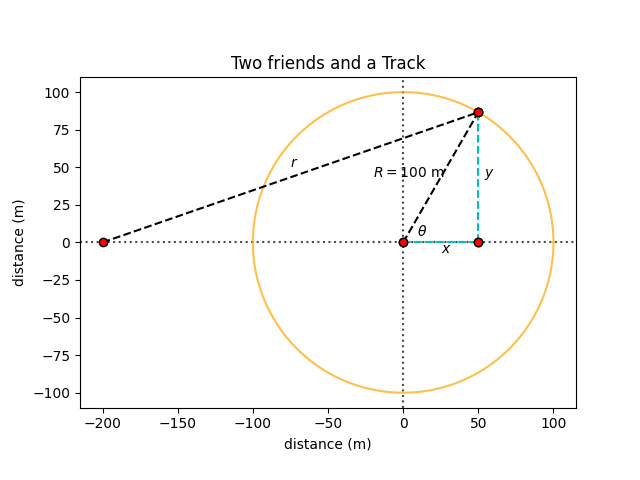

In [4]:
"""
Again, for self consistency, I will define every variable required to 
graph the problem. We need to define a function for a circle. To do so,
I will plot it in terms of polar coordinates and converting to cartesian.
"""

def circle(theta):
    x = 100*np.cos(theta)
    y = 100*np.sin(theta)

    return x, y

#define the angles for the circle
theta = np.linspace(0, 2*np.pi, 1000)

#calculate circle
x, y = circle(theta)

#define the coordinates for the center of the 
#circle, a point on the circle, and the friend 200 m 
#away

x0 = 0
y0 = 0
xf = -200
yf = 0

xc, yc = circle(np.pi/3)

fig, ax = plt.subplots()
#plot coordinate axes
ax.axhline(0, ls=":", color='k', alpha=0.7)
ax.axvline(0, ls=':', color='k', alpha=0.7)
#plot the circle
ax.plot(x, y, color='orange', alpha=0.7)

#plot the friend to circle
ax.plot([xf, xc], [yf, yc], color='k', 
        marker='o', markerfacecolor='r', 
        markeredgecolor='k', ls='--')

#plot from center to circle
ax.plot([x0, xc], [y0, yc], color='k',
        marker='o',markerfacecolor='r', 
        markeredgecolor='k', ls='--')

#plot from center to xc

ax.plot([x0, xc], [y0, y0], color='c',
        marker='o',markerfacecolor='r', 
        markeredgecolor='k', ls='--')

#plot from xc to yc
ax.plot([xc, xc], [y0, yc], color='c',
        marker='o',markerfacecolor='r', 
        markeredgecolor='k', ls='--')

ax.set_aspect(1) #ensures 1:1 aspect ratio

ax.text(9, 4, '$\\theta$')
ax.text(xc/2-45, yc/2, '$R = 100$ m')
ax.text(xc/2, -7, '$x$')
ax.text(xc+4, yc/2, '$y$')
ax.text(-75, 50, '$r$')

ax.set_xlabel('distance (m)')
ax.set_ylabel('distance (m)')

ax.set_title('Two friends and a Track')

plt.show()

Using the above image, we can now start analyzing the problem. From the statement, we know that 

\begin{align*}
R &= 100 \text{ m}\\
\frac{\text{d}s}{\text{d}t} &= R \frac{\text{d}\theta}{\text{d}t} = 7 \text{ m/s}\\
x_{\text{friend}} &= -200 \text{ m}
\end{align*}

In the second line above, we have used the fact that $s = R\theta$ and that $R$ is constant. From the above, we can also deduce that

\begin{align*}
x &= R \sin \theta \\
y &= R \cos \theta
\end{align*}

so that 

\begin{align*}
r^2 &= (x+200)^2 + y^2 \\
&= (R\cos \theta + 200)^2 + R^2\sin^2 \theta\\
&= R^2\cos^2 \theta + 400 R \cos \theta + 40,000 + R^2 \sin^2 \theta \\
&= R^2 + 400 R \cos \theta + 40,000
\end{align*}

where we use the identity $\sin^2 \theta + \cos^2 \theta = 1$. Differentiating implicitly with respect to time, we find that 

\begin{align*}
2r \frac{\text{d}r}{\text{d}t} &= -400 R \sin \theta \frac{\text{d}\theta}{\text{d}t} \\
\implies \frac{\text{d}r}{\text{d}t} &= \frac{-200 R \sin \theta \frac{\text{d}\theta}{\text{d}t}}{r} \\
&= \frac{-200 R  \frac{\text{d}\theta}{\text{d}t}\sin \theta}{\sqrt{R^2 + 400 R \cos \theta + 40,000}}

\end{align*}

Note that we already know $\frac{\text{d}s}{\text{d}t} = R \frac{\text{d}\theta}{\text{d}t} = 7 \text{ m/s}$, so all that is left to find
is $\cos \theta$ and $\sin \theta$ for when $r = 200$ m, as given in the problem statement. Using our equation for $r^2$, we can solve for 
$\cos \theta$, which turns out to be

\begin{align*}
\cos \theta = \frac{r^2 - R^2 - 40000}{400R} \\
\implies \sin \theta = \sin 
\begin{bmatrix}
\arccos 
\begin{pmatrix}
\frac{r^2 - R^2 - 40000}{400R}
\end{pmatrix} 
\end{bmatrix}
\end{align*}

Plugging in all the appropriate numbers, we find 

\begin{align*}
\theta = 104.48^{\text{o}}\\
\frac{\text{d}r}{\text{d}t} = -7 \text{ m/s}

\end{align*}

Note that we assumed a counterclockwise running direction and that the angle is in the second quadrant, so that at $r = 200$ m, the runner is running toward their friend. However, if we consider the symmetry, we could also consider $\theta = -104.48^{\text{o}}$ in the third quadrant, in which the runner would be moving away from their friend.

In the following cells, I will plot and then animate the situation as I did above. 

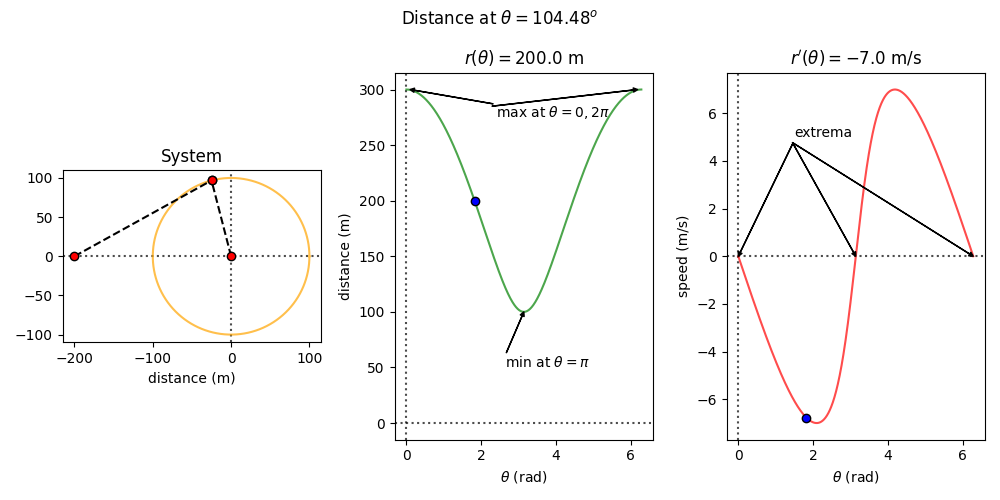

In [ ]:
def rCircle(theta):
    R = 100
    x0 = -200
    return np.sqrt(R**2 - 2*x0*R*np.cos(theta) + x0**2)

def rCirclePrime(theta):
    R = 100
    x0 = -200
    sDot = 7
    return x0*np.sin(theta)*sDot/rCircle(theta)

#define the angles for the circle
theta = np.linspace(0, 2*np.pi, 1000)

#calculate circle
x, y = circle(theta)

#define the coordinates for the center of the 
#circle, a point on the circle, and the friend 200 m 
#away

x0 = 0
y0 = 0
xf = -200
yf = 0

thetaC = 104.477*np.pi/180
xc, yc = circle(thetaC)

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for a in ax:
    a.axhline(0, ls=':', color='k', alpha=0.7)
    a.axvline(0, ls=':', color='k', alpha=0.7)
   



#plot the circle
ax[0].plot(x, y, color='orange', alpha=0.7)

#plot the friend to circle
ax[0].plot([xf, xc], [yf, yc], color='k', 
        marker='o', markerfacecolor='r', 
        markeredgecolor='k', ls='--')

#plot from center to circle
ax[0].plot([x0, xc], [y0, yc], color='k',
        marker='o',markerfacecolor='r', 
        markeredgecolor='k', ls='--')

ax[0].set_xlabel('distance (m)')
ax[0].set_aspect(1)

#now plot the distance r(theta)
ax[1].plot(theta, rCircle(theta), color='g', alpha=0.7)
ax[1].plot(thetaC, rCircle(thetaC), color='c', ls='', 
           marker='o', markerfacecolor='b', 
           markeredgecolor='k')

#now the speed
ax[2].plot(theta, rCirclePrime(theta), color='r', alpha=0.7)
ax[2].plot(thetaC, rCirclePrime(thetaC), color='c', ls='', 
           marker='o', markerfacecolor='b', 
           markeredgecolor='k')

#create titles
ax[0].set_title(('System'))
ax[1].set_title("$r(\\theta) = {}$ m".format(np.round(rCircle(thetaC))))
ax[2].set_title("$r'(\\theta) = {}$ m/s".format(np.round(rCirclePrime(thetaC))))

#axis labels
ax[1].set_xlabel('$\\theta$ (rad)')
ax[1].set_ylabel('distance (m)')

ax[2].set_xlabel('$\\theta$ (rad)')
ax[2].set_ylabel('speed (m/s)')

#now add the annotations
ax[1].annotate(
    'min at $\\theta = \\pi$', 
    xy=(np.pi, 100), 
    xytext=(np.pi-.5, 50), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[1].annotate(
    'max at $\\theta = 0, 2\\pi$', 
    xy=(.1, 300), 
    xytext=(np.pi-.75, 275), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[1].annotate(
    '', 
    xy=(2*np.pi-.1, 300), 
    xytext=(np.pi-.85, 285), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    'extrema', 
    xy=(0,0),
    xytext=(1.5,5),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    '', 
    xy=(np.pi,0),
    xytext=(1.45,4.77),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(2*np.pi,0),
    xytext=(1.45,4.77),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

fig.suptitle('Distance at $\\theta = {}^o$'.format(np.round(thetaC*180/np.pi, 2)))
fig.tight_layout()
plt.show()
